In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics

In [197]:
from sklearn import feature_extraction

In [198]:
data = pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1')

Podaci ucitani na ovaj nacin nemaju pravilno imenovane atribute, pa su preimenovani sa odgovarajucim nazivima 

In [199]:
data = data.rename(columns={'0':'Sentiment',
                     '1467810369': 'Tweet ID',
                     'Mon Apr 06 22:19:45 PDT 2009':'Date',
                     'NO_QUERY':'Query',
                     '_TheSpecialOne_':'Username',
                     "@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Tweet'})

In [200]:
data.head(2)

,Sentiment,Tweet ID,Date,Query,Username,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


Sentiment atribut oznacava da li je tvit pozitivan ili negativan. Vrednosti oznacene sa 0 odgovaraju negativnom sentimentu, 2 odgovara neutralnom sentimentu, dok 4 odgovara pozitivnom sentimentu

In [201]:
sentiments = data['Sentiment'].value_counts().keys()
sentiments

Index([4, 0], dtype='int64', name='Sentiment')

In [202]:
np.unique(sentiments)

array([0, 4], dtype=int64)

Kao sto mozemo da primetimo, uklonjeni su svi neutralni sentimenti, sa tim na umu su remapirane ciljne vrednosti u 0 (negativan) i 1 (pozitivan)

In [203]:
def username_removal(string):
    
    for i in range(string.count('@')): 
        username_begin_index = string.find('@')
        username_end_index = string[username_begin_index::].find(' ') + username_begin_index
    
        string = string.replace(string[username_begin_index:username_end_index+1],' ')
    
    return string                    

In [204]:
data['Tweet'] = data['Tweet'].apply(username_removal)

In [205]:
def Sentiment_remap(x):
    if x == 0:
        return 0
    else:
        return 1

In [206]:
data['Sentiment'] = data['Sentiment'].apply(Sentiment_remap)

In [207]:
x = data['Tweet']
y = data['Sentiment']

In [208]:
print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (1599999,)
y shape:  (1599999,)


## Potrebno je napraviti vokabular

In [209]:
import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

In [210]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mata2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [211]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,train_size=0.01, test_size=0.01, stratify=y, random_state=7)

In [212]:
x_train.shape

(15999,)

Delimo tvitove na recenice, pripremamo ih za tokenizaciju

In [213]:
def tweet_tokenizer(tweet):
    tweet_tokens = nltk.tokenize.word_tokenize(tweet)
    
    tweet_stems = []
    stemmer = nltk.stem.LancasterStemmer()
    
    for token in tweet_tokens:
        if token in string.punctuation:
            continue
        if token in stopwords_list:
            continue
        if token.isdigit():
            continue
            
        stem = stemmer.stem(token)
        tweet_stems.append(stem)
        
    return tweet_stems

In [214]:
stopwords_list = stopwords.words('english')

In [215]:
count_vectorizer = feature_extraction.text.CountVectorizer(min_df=2, tokenizer=tweet_tokenizer)

In [216]:
count_vectorizer.fit(x_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2,
                tokenizer=<function tweet_tokenizer at 0x000001D5A3B63560>)

In [217]:
feature_names = count_vectorizer.get_feature_names_out()
vocab_size = len(feature_names)
vocab_size

5295

In [218]:
x_train_vectorized = count_vectorizer.transform(x_train)
x_test_vectorized = count_vectorizer.transform(x_test)

In [219]:
x_train_vectorized.shape

(15999, 5295)

# Model 1 - logisticka regresija

In [220]:
model1 = linear_model.LogisticRegression()

In [221]:
model1.fit(x_train_vectorized,y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Tacnost modela na trening i test skupu

In [222]:
model1_skor_train = model1.score(x_train_vectorized, y_train)
model1_skor_test = model1.score(x_test_vectorized, y_test)

In [223]:
print("skor na podacima za treniranje: ", model1_skor_train)
print('skor na podacima za testiranje: ', model1_skor_test)

skor na podacima za treniranje:  0.8422401400087506
skor na podacima za testiranje:  0.7333125


### Matrica konfuzije - logisticka regresija

In [224]:
y_predicted_lr = model1.predict(x_test_vectorized)

In [225]:
matrica_konfuzije_lr = metrics.confusion_matrix(y_test, y_predicted_lr)
matrica_konfuzije_lr

array([[5682, 2318],
       [1949, 6051]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

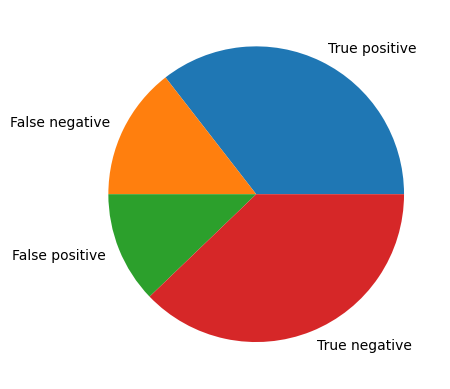

In [226]:
plt.pie(matrica_konfuzije_lr.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

# MODEL 2 - linearni SVM

In [227]:
model2 = svm.LinearSVC()

In [228]:
model2.fit(x_train_vectorized, y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [229]:
model2_skor_train = model2.score(x_train_vectorized, y_train)
model2_skor_test = model2.score(x_test_vectorized, y_test)

In [230]:
print("skor na podacima za treniranje: ", model2_skor_train)
print('skor na podacima za testiranje: ', model2_skor_test)

skor na podacima za treniranje:  0.8776798549909369
skor na podacima za testiranje:  0.7145625


In [231]:
y_pred_svm = model2.predict(x_test_vectorized)
matrica_konfuzije_svm = metrics.confusion_matrix(y_test, y_pred_svm)
matrica_konfuzije_svm

array([[5576, 2424],
       [2143, 5857]], dtype=int64)

### Matrica konfuzije - linearni SVM

<function matplotlib.pyplot.show(close=None, block=None)>

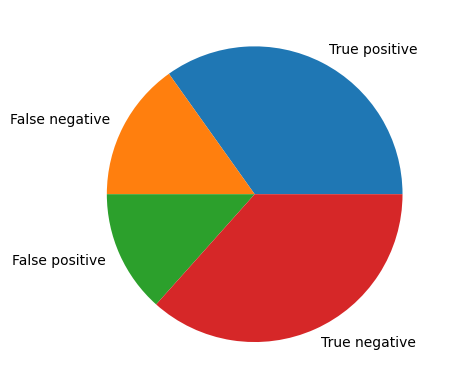

In [232]:
plt.pie(matrica_konfuzije_svm.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

# MODEL 3 - k najblizih suseda

In [235]:
model3 = neighbors.KNeighborsClassifier(n_neighbors=4)

In [236]:
model3.fit(x_train_vectorized, y_train)

KNeighborsClassifier(n_neighbors=4)

In [237]:
model3_skor_train = model3.score(x_train_vectorized, y_train)
model3_skor_test = model3.score(x_test_vectorized, y_test)

In [238]:
print("skor na podacima za treniranje: ", model3_skor_train)
print('skor na podacima za testiranje: ', model3_skor_test)

skor na podacima za treniranje:  0.7796737296081006
skor na podacima za testiranje:  0.6375625


In [239]:
y_pred_kneigh = model3.predict(x_test_vectorized)
matrica_konfuzije_kneigh = metrics.confusion_matrix(y_test, y_pred_kneigh)
matrica_konfuzije_kneigh

array([[5597, 2403],
       [3396, 4604]], dtype=int64)

### Matrica konfuzije - k najblizih suseda

<function matplotlib.pyplot.show(close=None, block=None)>

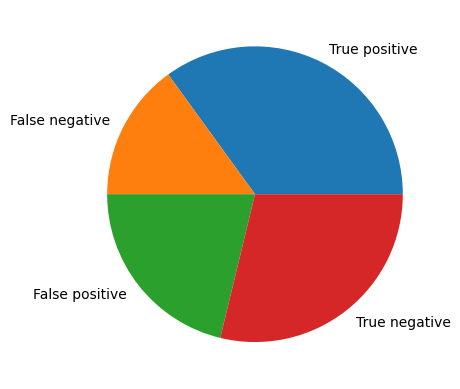

In [240]:
plt.pie(matrica_konfuzije_kneigh.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

## LEMATIZACIJA

In [241]:
def get_wordnet_pos_tag(token):
    #uparujemo prvi karakter PennTreebank POS obelezja sa odgovarajucim WordNet POS obelezjem
    pos_tag_dict = {
        'N' : 'n',
        'V' : 'v',
        'J' : 'a',
        'R' : 'r'
    }
    
    penn_pos_tag = nltk.pos_tag([token])[0][1][0]
    
    #mapiramo ga u odgovarajuce WordNet POS obelezje ili postavljamo podrazumevano na POS obelezje imenice
    if penn_pos_tag in pos_tag_dict:
        return pos_tag_dict[penn_pos_tag]
    else:
        return 'n'

In [242]:
def tweet_lemma_tokenizer(tweet):
    tweet_tokens = nltk.tokenize.word_tokenize(tweet)
    
    tweet_lemmas = []
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    for token in tweet_tokens:
        if token in string.punctuation:
            continue
        if token in stopwords_list:
            continue
        if token.isdigit():
            continue
            
        pos_tag = get_wordnet_pos_tag(token)
        lemma = lemmatizer.lemmatize(token, pos_tag)
        tweet_lemmas.append(lemma)
        
    return tweet_lemmas

In [243]:
count_vectorizer = feature_extraction.text.CountVectorizer(min_df=2, tokenizer=tweet_lemma_tokenizer)

In [244]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mata2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Model 1 - logisticka regresija

In [245]:
model4 = linear_model.LogisticRegression()

In [246]:
model4.fit(x_train_vectorized,y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Tacnost modela na trening i test skupu

In [247]:
model4_skor_train = model4.score(x_train_vectorized, y_train)
model4_skor_test = model4.score(x_test_vectorized, y_test)

In [248]:
print("skor na podacima za treniranje: ", model4_skor_train)
print('skor na podacima za testiranje: ', model4_skor_test)

skor na podacima za treniranje:  0.8422401400087506
skor na podacima za testiranje:  0.7333125


### Matrica konfuzije - logisticka regresija

In [249]:
y_predicted_lr = model4.predict(x_test_vectorized)

In [250]:
matrica_konfuzije_lr = metrics.confusion_matrix(y_test, y_predicted_lr)
matrica_konfuzije_lr

array([[5682, 2318],
       [1949, 6051]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

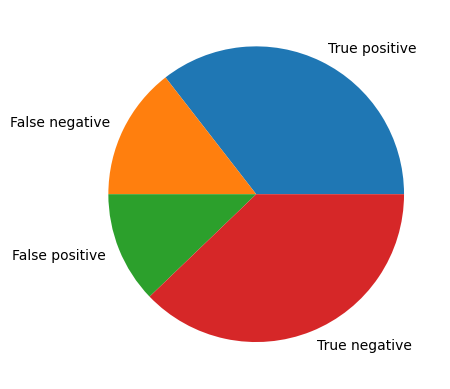

In [251]:
plt.pie(matrica_konfuzije_lr.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

# MODEL 2 - linearni SVM

In [252]:
model5 = svm.LinearSVC()

In [253]:
model5.fit(x_train_vectorized, y_train)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [254]:
model5_skor_train = model5.score(x_train_vectorized, y_train)
model5_skor_test = model5.score(x_test_vectorized, y_test)

In [255]:
print("skor na podacima za treniranje: ", model5_skor_train)
print('skor na podacima za testiranje: ', model5_skor_test)

skor na podacima za treniranje:  0.8779923745234077
skor na podacima za testiranje:  0.714875


In [256]:
y_pred_svm = model5.predict(x_test_vectorized)
matrica_konfuzije_svm = metrics.confusion_matrix(y_test, y_pred_svm)
matrica_konfuzije_svm

array([[5576, 2424],
       [2138, 5862]], dtype=int64)

### Matrica konfuzije - linearni SVM

<function matplotlib.pyplot.show(close=None, block=None)>

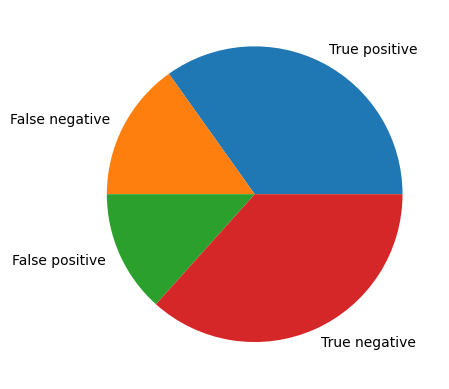

In [257]:
plt.pie(matrica_konfuzije_svm.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show

# MODEL 3 - k najblizih suseda

In [258]:
model6 = neighbors.KNeighborsClassifier(n_neighbors=4)

In [259]:
model6.fit(x_train_vectorized, y_train)

KNeighborsClassifier(n_neighbors=4)

In [260]:
model6_skor_train = model6.score(x_train_vectorized, y_train)
model6_skor_test = model6.score(x_test_vectorized, y_test)

In [261]:
print("skor na podacima za treniranje: ", model6_skor_train)
print('skor na podacima za testiranje: ', model6_skor_test)

skor na podacima za treniranje:  0.7796737296081006
skor na podacima za testiranje:  0.6375625


In [262]:
y_pred_kneigh = model6.predict(x_test_vectorized)
matrica_konfuzije_kneigh = metrics.confusion_matrix(y_test, y_pred_kneigh)
matrica_konfuzije_kneigh

array([[5597, 2403],
       [3396, 4604]], dtype=int64)

### Matrica konfuzije - k najblizih suseda

<function matplotlib.pyplot.show(close=None, block=None)>

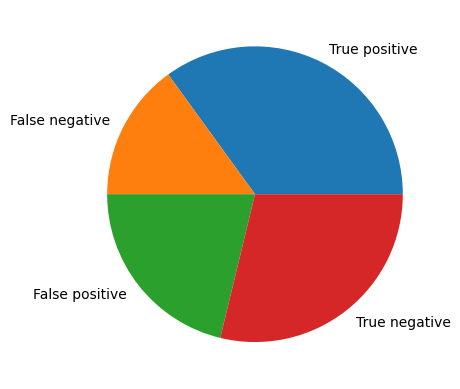

In [263]:
plt.pie(matrica_konfuzije_kneigh.ravel(), labels=['True positive', 'False negative','False positive', 'True negative'])
plt.show